<h1 style="font-size: 45px; font-family: cursive; color:#191970">Loan Predection</h1>


![loans](loan-repayment-2.jpg)

<h3 style="color: rgb(70, 80, 96); opacity: 0.8;  letter-spacing: 2px; line-height: 1.6">


<h1 style="font-family:Times New Roman; font-size:1.5em;color:black;">  Problem Defination: </h1>


### 👉 The company seeks to automate (in real time) the loan qualifying procedure based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not

<h1 style="font-family:Times New Roman; font-size:2.0em;color:black;"> Data Description: </h1>

| Feature  | Description |
| -------- | ----------- |
| Loan_ID |  Unique Loan ID. |
| Gender |  Male or Female.|
| Married| Married or not. |
| Dependents |Number of dependents |
| Education| int | Villa viwers |
| Self_Employed|Self_Employed(Y/N). |
| ApplicantIncome | Applicant Income.|
|CoapplicantIncome|Co_applicant Income. |
|LoanAmount| Loan Amount in thousands. |
| Loan_Amount_Term| Term of loan in months. |
| Credit_History| Credit History meets guildlines.  |
|Property_Area| Urban / semi urban / Rural  |
|Loan_Status| Target of loan(Y/N). |


In [797]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder , RobustScaler
from category_encoders import BinaryEncoder
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [722]:
df=pd.read_csv('train_ctrUa4K.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [723]:
# number of rows and columns
df.shape

(614, 13)

In [724]:
#Print summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [725]:
#check the Duplicated Data 
df.duplicated().sum()

0

In [726]:
# number of missing values in each column
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [727]:
df.isnull().mean()*100
#perecentage of missing values
#delete missing data 

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [728]:
df.dropna(inplace=True)

In [729]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [730]:
df.reset_index(drop=True,inplace=True)

In [731]:
#drop unimportant columns
df.drop(['Loan_ID'],axis=1,inplace=True)

In [732]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
475,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
476,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
477,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
478,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<h1 style="font-family:Times New Roman; font-size:6m;color:BLUE;"><em> UniVariate Analysis</em> </h1>

In [733]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### - Gender

In [734]:
df['Gender'].value_counts()

Gender
Male      394
Female     86
Name: count, dtype: int64

In [735]:
#categorical 
# make Gender perecentage
df['Gender'].value_counts(normalize=True)*100


Gender
Male      82.083333
Female    17.916667
Name: proportion, dtype: float64

### - Married


In [736]:
df['Married'].value_counts()

Married
Yes    311
No     169
Name: count, dtype: int64

In [737]:
#categorical 
# make Gender perecentage
df['Married'].value_counts(normalize=True)*100

Married
Yes    64.791667
No     35.208333
Name: proportion, dtype: float64

### - Dependents

In [738]:
df['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [739]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [740]:

'''
def fix_dependance(d):
    if pd.notna(d):
        s = str(d).split()[0]
        if s.endswith('+'):
            return int(s[:-1])
        else:
            return int(s)
    else:
        return np.nan
'''


"\ndef fix_dependance(d):\n    if pd.notna(d):\n        s = str(d).split()[0]\n        if s.endswith('+'):\n            return int(s[:-1])\n        else:\n            return int(s)\n    else:\n        return np.nan\n"

In [741]:
#df['Dependents'] = df['Dependents'].apply(fix_dependance)

In [742]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
475,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
476,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
477,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
478,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### -Education


In [743]:
df['Education'].value_counts()

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

In [744]:
#categorical 
# make Education perecentage
df['Education'].value_counts(normalize=True)*100

Education
Graduate        79.791667
Not Graduate    20.208333
Name: proportion, dtype: float64

### -Self_Employed

In [745]:
df['Self_Employed'].value_counts()

Self_Employed
No     414
Yes     66
Name: count, dtype: int64

In [746]:
#categorical 
# make Education perecentage
df['Self_Employed'].value_counts(normalize=True)*100

Self_Employed
No     86.25
Yes    13.75
Name: proportion, dtype: float64

### -ApplicantIncome

In [747]:
df['ApplicantIncome'].unique()

array([ 4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006, 12841,
        3200,  3073,  1853,  1299,  4950,  3510,  4887,  7660,  5955,
        2600,  9560,  2799,  4226,  1442,  3167,  4692,  3500, 12500,
        3667,  4166,  3748,  3600,  1800,  3941,  5649,  5821,  2645,
        4000,  1928,  3086,  4230,  4616, 11500,  2708,  2132,  3366,
        8080,  3357,  2500,  3029,  2609,  5726, 10750,  7100,  4300,
        3208,  1875,  5266,  3750,  1000,  3846,  1378,  3988,  2366,
        8566,  5695,  2958,  6250,  3273,  4133,  3620,  2484,  1977,
        4188,  1759,  4288,  4843,  3052, 11417,  3800,  2071,  5316,
       14583,  5568, 10408,  2137,  2957, 10513,  2014,  2718,  3459,
        4895,  3316, 14999,  4200,  5042,  6950,  2698, 11757,  2330,
       14866,  1538, 10000,  4860,  6277,  2577,  9166,  2281,  3254,
       39999,  9538,  1863,  7933,  3089,  4167,  9323,  2439,  2237,
        8000,  3522,  5708,  4344,  3497,  2045,  5516,  6400,  4600,
       33846,  3625,

### -CoapplicantIncome

In [748]:
df['CoapplicantIncome'].unique()

array([1.50800000e+03, 0.00000000e+00, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 8.10600000e+03, 2.84000000e+03, 1.08600000e+03,
       5.62500000e+03, 1.91100000e+03, 2.25300000e+03, 1.04000000e+03,
       1.66700000e+03, 3.00000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 1.88100000e+03, 2.53100000e+03, 2.11800000e+03,
       4.16700000e+03, 2.90000000e+03, 5.65400000e+03, 1.82000000e+03,
       2.30200000e+03, 9.97000000e+02, 3.54100000e+03, 3.26300000e+03,
       3.80600000e+03, 1.03000000e+03, 1.12600000e+03, 3.60000000e+03,
      

In [749]:


# create a new variable that combines the income of the applicant and co-applicant
#df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [750]:
# create a box plot of Total_Income by Loan_Status
#sns.boxplot(x='Loan_Status', y='Total_Income', data=df, palette=['red', 'green'])

# add labels and title
#plt.xlabel('Loan Approval Status')
#plt.ylabel('Total Income')
#plt.title('Relationship between Loan Approval Status and Total Income')

# display the plot
#plt.show()

### -LoanAmount

In [751]:
df['LoanAmount'].unique()

array([128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70., 200.,
       114.,  17., 125.,  76., 133., 104., 315., 116., 191., 122., 110.,
        35.,  74., 106., 320., 144., 184.,  80.,  47., 134.,  44., 100.,
       112., 286.,  97.,  96., 135., 180.,  99., 165., 258., 126., 312.,
       136., 172.,  81., 187., 113., 176., 111., 167.,  50., 210., 175.,
       131., 188.,  25., 137., 115., 151., 225., 216.,  94., 185., 154.,
       259., 194., 160., 102., 290.,  84.,  88., 242., 129.,  30., 118.,
       152., 244., 600., 255.,  98., 275., 121.,  75.,  63.,  87., 101.,
       495.,  73., 260., 108.,  48., 164., 170.,  83.,  90., 166., 124.,
        55.,  59., 127., 214., 240., 130.,  60., 280., 140., 155., 123.,
       201., 138., 279., 192., 304., 150., 207., 436.,  78.,  54.,  89.,
       139.,  93., 132., 480.,  56., 300., 376.,  67., 117.,  71., 173.,
        46., 228., 308., 105., 236., 570., 380., 296., 156., 109., 103.,
        45.,  65.,  53., 360.,  62., 218., 178., 23

In [752]:
df['LoanAmount']=df['LoanAmount']*1000

In [753]:
df['LoanAmount'].unique()

array([128000.,  66000., 120000., 141000., 267000.,  95000., 158000.,
       168000., 349000.,  70000., 200000., 114000.,  17000., 125000.,
        76000., 133000., 104000., 315000., 116000., 191000., 122000.,
       110000.,  35000.,  74000., 106000., 320000., 144000., 184000.,
        80000.,  47000., 134000.,  44000., 100000., 112000., 286000.,
        97000.,  96000., 135000., 180000.,  99000., 165000., 258000.,
       126000., 312000., 136000., 172000.,  81000., 187000., 113000.,
       176000., 111000., 167000.,  50000., 210000., 175000., 131000.,
       188000.,  25000., 137000., 115000., 151000., 225000., 216000.,
        94000., 185000., 154000., 259000., 194000., 160000., 102000.,
       290000.,  84000.,  88000., 242000., 129000.,  30000., 118000.,
       152000., 244000., 600000., 255000.,  98000., 275000., 121000.,
        75000.,  63000.,  87000., 101000., 495000.,  73000., 260000.,
       108000.,  48000., 164000., 170000.,  83000.,  90000., 166000.,
       124000.,  550

In [754]:
### -Loan_Amount_Term

In [755]:
df['Loan_Amount_Term'].unique()

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

In [756]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### -Credit_History

In [757]:
df['Credit_History'].value_counts()

Credit_History
1.0    410
0.0     70
Name: count, dtype: int64

<Axes: xlabel='Credit_History', ylabel='count'>

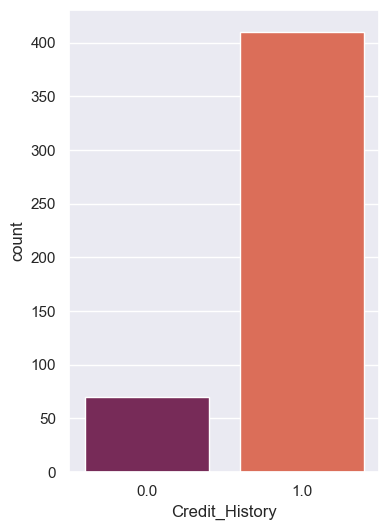

In [758]:
sns.countplot(data=df, x='Credit_History', palette="rocket")

In [759]:
from datasist.structdata import detect_outliers


In [760]:
outlier_indicies= detect_outliers(df,0,['ApplicantIncome'])
len(outlier_indicies)

40

### -Property_Area

In [761]:
df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [762]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

<Axes: xlabel='Property_Area', ylabel='count'>

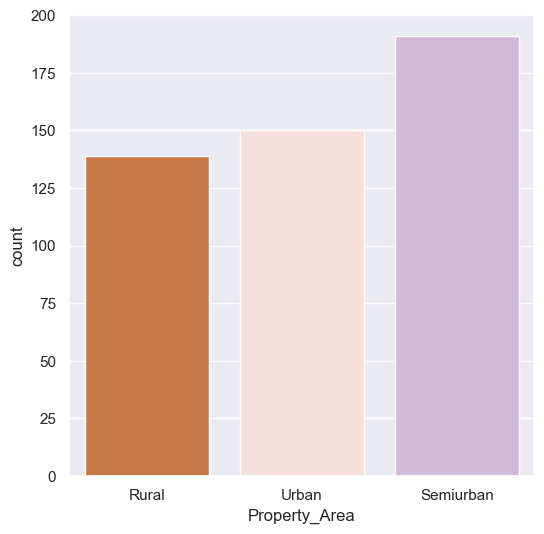

In [763]:
sns.set(rc={'figure.figsize':(6,6)})
pal = [ "#DC7633" , "#FADBD8" , '#D2B4DE']
sns.countplot(data=df, x='Property_Area', palette= pal )

### -Loan_Status

In [764]:
df['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [765]:
df['Loan_Status'].value_counts()

Loan_Status
Y    332
N    148
Name: count, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='count'>

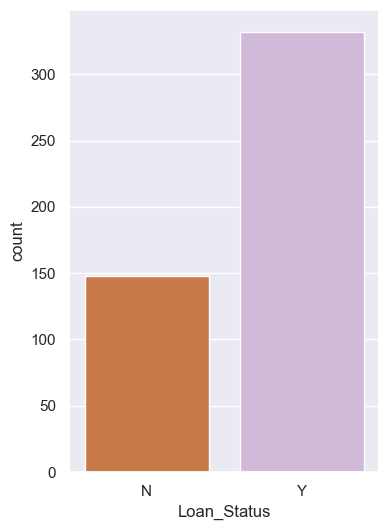

In [766]:
sns.set(rc={'figure.figsize':(4,6)})
pal = [ "#DC7633" , '#D2B4DE']
sns.countplot(data=df, x='Loan_Status', palette= pal )


<h1 style="font-family:Times New Roman; font-size:6m;color:BLUE;"><em>Feature Engineering</em> </h1>

In [767]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].apply(lambda x : x/12 if pd.notna(x) else x )

In [768]:
df['Loan_Amount_Term'].unique()

array([30., 10., 15.,  5., 25., 40., 20.,  3.,  7.])

#### Get loan amount in thousands


In [769]:
df['Debt_Payment_month'] = df['LoanAmount'] / (df['Loan_Amount_Term'] *12) 

In [770]:
df['Debt_Payment_month']

0      355.555556
1      183.333333
2      333.333333
3      391.666667
4      741.666667
          ...    
475    197.222222
476    222.222222
477    702.777778
478    519.444444
479    369.444444
Name: Debt_Payment_month, Length: 480, dtype: float64

In [771]:
df['DTI'] =( df['Debt_Payment_month'] / df['ApplicantIncome']) * 100

In [772]:
df['DTI'].value_counts()

DTI
6.944444     2
7.051824     2
7.758140     1
14.741322    1
11.809406    1
            ..
9.366466     1
9.615385     1
2.095960     1
6.233583     1
8.061192     1
Name: count, Length: 478, dtype: int64

In [773]:
def categorize_DTI(r):
    if pd.notna(r):
        if r <= 20 :
            return "Low"
        elif (r > 20) and (r <= 50):
            return "Medium"

        elif (r > 50) and (r <= 90):
            return "High"
        else:
            return "Very High"
    else:
        return np.nan
    
df['DTI_categories'] = df['DTI'].apply(categorize_DTI)

In [774]:
df['DTI_categories'].value_counts()

DTI_categories
Low          448
Medium        27
High           3
Very High      2
Name: count, dtype: int64

In [775]:
df['DTI'].describe()

count    480.000000
mean      11.387951
std       14.348844
min        0.837816
25%        6.586499
50%        8.732240
75%       12.583192
max      250.000000
Name: DTI, dtype: float64

### Handling outliers

In [776]:
outlier_indicies= detect_outliers(df,0,['ApplicantIncome','CoapplicantIncome', 'LoanAmount'])
len(outlier_indicies)

63

In [777]:
df = df.drop(outlier_indicies, axis=0)
df = df.reset_index(drop=True)

In [778]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Debt_Payment_month,DTI,DTI_categories
0,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,30.0,1.0,Rural,N,355.555556,7.758140,Low
1,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,30.0,1.0,Urban,Y,183.333333,6.111111,Low
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,30.0,1.0,Urban,Y,333.333333,12.904891,Low
3,Male,No,0,Graduate,No,6000,0.0,141000.0,30.0,1.0,Urban,Y,391.666667,6.527778,Low
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267000.0,30.0,1.0,Urban,Y,741.666667,13.691465,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,Female,No,0,Graduate,No,2900,0.0,71000.0,30.0,1.0,Rural,Y,197.222222,6.800766,Low
413,Male,Yes,3+,Graduate,No,4106,0.0,40000.0,15.0,1.0,Rural,Y,222.222222,5.412134,Low
414,Male,Yes,1,Graduate,No,8072,240.0,253000.0,30.0,1.0,Urban,Y,702.777778,8.706365,Low
415,Male,Yes,2,Graduate,No,7583,0.0,187000.0,30.0,1.0,Urban,Y,519.444444,6.850118,Low


In [779]:
df.reset_index(drop = True , inplace = True)

# ◾ Answer Buisness Questions

In [780]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Debt_Payment_month', 'DTI', 'DTI_categories'],
      dtype='object')

<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> -Is Gender affect Loan_Status?  </h1>

<Axes: xlabel='Gender', ylabel='count'>

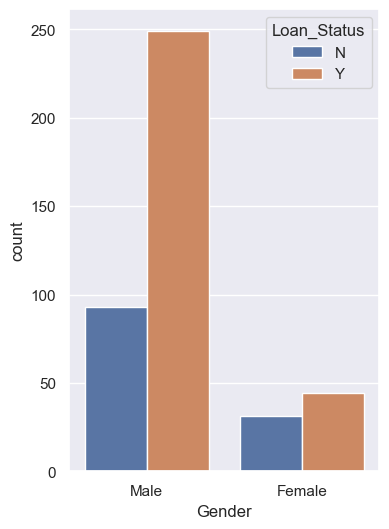

In [781]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)
#yes Male has high periority

<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> -Married status affect approval of loans?  </h1>

In [782]:


# compute the percentage of approved loans for married and unmarried applicants
married_approval_rate = df.loc[df['Married'] == 'Yes', 'Loan_Status'].value_counts(normalize=True)['Y']
unmarried_approval_rate = df.loc[df['Married'] == 'No', 'Loan_Status'].value_counts(normalize=True)['Y']

# print the results
print('Approval rate for married applicants: {:.2f}%'.format(married_approval_rate * 100))
print('Approval rate for unmarried applicants: {:.2f}%'.format(unmarried_approval_rate * 100))

Approval rate for married applicants: 74.07%
Approval rate for unmarried applicants: 63.27%


<Axes: xlabel='Married', ylabel='count'>

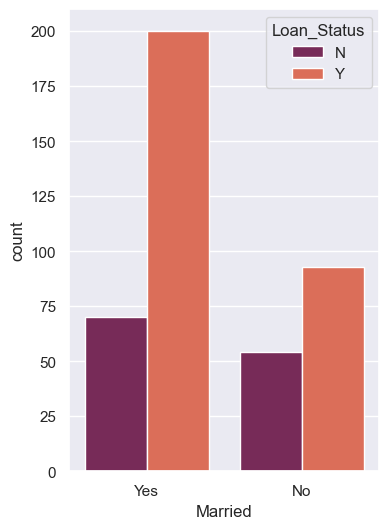

In [783]:
# create a count plot of loan approval by marital status
sns.countplot(x='Married', hue='Loan_Status',palette="rocket" ,data=df)

In [784]:
# compute the approval rate by gender and education level
approval_rate = df.groupby(['Gender', 'Education'])['Loan_Status'].apply(lambda x: (x=='Y').sum() / len(x)).reset_index()
approval_rate.rename(columns={'Loan_Status': 'Approval_Rate'}, inplace=True)
approval_rate

,Gender,Education,Approval_Rate
0,Female,Graduate,0.578125
1,Female,Not Graduate,0.636364
2,Male,Graduate,0.764479
3,Male,Not Graduate,0.614458


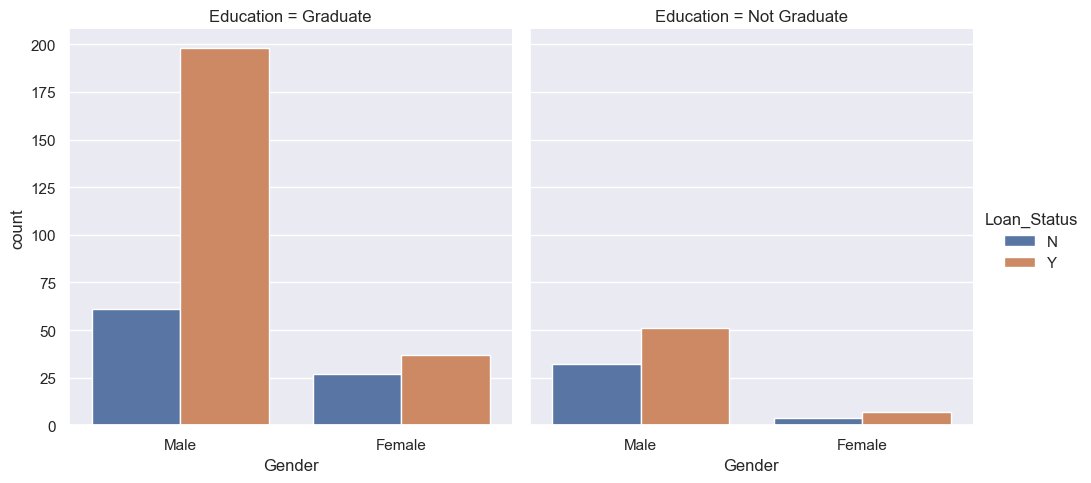

In [785]:
# create a count plot of loan approval by gender and education level
sns.catplot(x='Gender', hue='Loan_Status', col='Education', kind='count', data=df)
# graduated male has high value of approval of loan

<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> -Is there any relationship between loan approval status and the number of dependents? </h1>

<Axes: xlabel='Dependents', ylabel='count'>

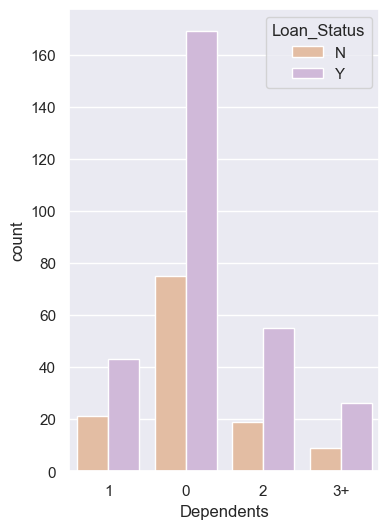

In [787]:
pal = ['#EDBB99','#D2B4DE']
sns.countplot(x='Dependents' , hue='Loan_Status',data=df , palette=pal)
#0 dependent has high periorty

In [ ]:
sns.boxplot(x='Loan_Status',y='Dependents',data=df)

In [ ]:
sns.countplot(x='Dependents', hue='Loan_Status', data=df)
#this show that hat the person that has zero Dependence has  high priority  of loan approval

 <h1 style="font-family:cursive; font-size:1.5em;color:brown;"> -Is there any relationship between loan approval status and ApplicantIncome?</h1>

In [476]:
df.groupby("Loan_Status")["ApplicantIncome"].sum()

Loan_Status
N     503511
Y    1220254
Name: ApplicantIncome, dtype: int64

In [477]:
summary = df.groupby('Loan_Status')['ApplicantIncome'].describe()

# print the results
print(summary)

             count         mean          std    min      25%     50%      75%   
Loan_Status                                                                     
N            124.0  4060.572581  1916.468815  150.0  2707.75  3590.5  4699.75  \
Y            293.0  4164.689420  1920.558768  645.0  2799.00  3704.0  5000.00   

                 max  
Loan_Status           
N            10000.0  
Y            10139.0  


In [481]:

bins = [0, 2500, 5000, 7500, 10000, df['ApplicantIncome'].max()]

# create labels for the bins
labels = ['Low', 'Moderate', 'High', 'Very High', 'Ultra High']

# create a new column with the income range of each applicant
df['Income_Range'] = pd.cut(df['ApplicantIncome'], bins=bins, labels=labels)

# count the number of approved and rejected loans for each income range
counts = df.groupby(['Income_Range', 'Loan_Status'])['Loan_Status'].count()

# print the results
print(counts)
# There is relation between them

Income_Range  Loan_Status
Low           N               23
              Y               55
Moderate      N               74
              Y              165
High          N               18
              Y               49
Very High     N                9
              Y               23
Ultra High    N                0
              Y                1
Name: Loan_Status, dtype: int64


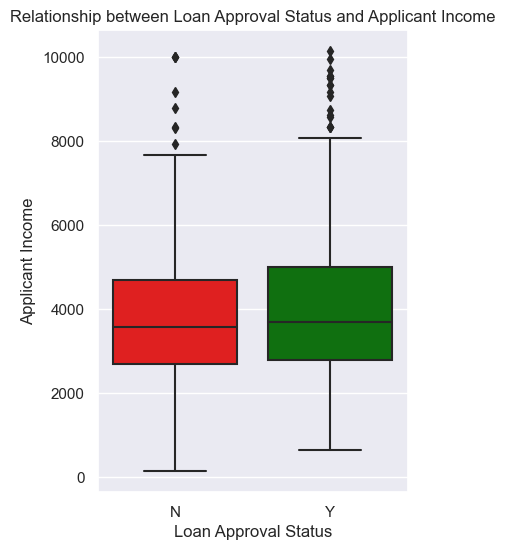

In [482]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette=['red', 'green'])

# add labels and title
plt.xlabel('Loan Approval Status')
plt.ylabel('Applicant Income')
plt.title('Relationship between Loan Approval Status and Applicant Income')

# display the plot
plt.show()

In [484]:
df[['ApplicantIncome', 'LoanAmount']].corr()

# This positive correlation suggests that there is a tendency for higher income applicants to request higher loan amounts. 

,ApplicantIncome,LoanAmount
ApplicantIncome,1.000000,0.521094
LoanAmount,0.521094,1.000000


<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> -What is the average credit history score among approved loan applicants? </h1>

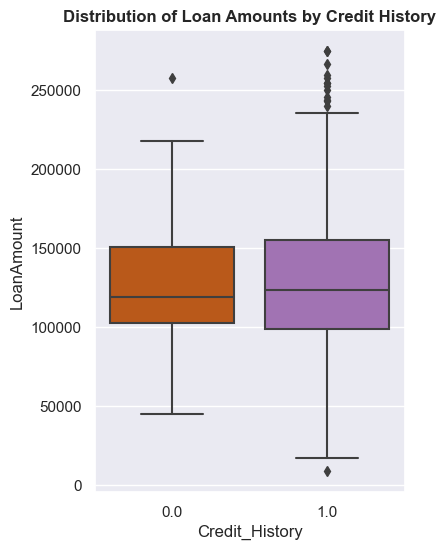

In [789]:
pal = ['#D35400','#A569BD']

sns.boxplot(x='Credit_History', y='LoanAmount', data=df , palette=pal)
plt.title('Distribution of Loan Amounts by Credit History' , {'weight' : 'bold','size': 12} )
plt.show()

<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> - How debit-to-income affect on loan status ?  </h1>

In [485]:
df.groupby('Loan_Status').describe()['DTI']

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
N,124.0,14258.613501,25159.074350,1051.303616,6289.999000,8691.978566,13076.801267,250000.0000
Y,293.0,10276.891160,5233.886007,1320.816061,7025.389145,8981.267642,12326.113752,40700.0407


<Axes: xlabel='Loan_Status', ylabel='count'>

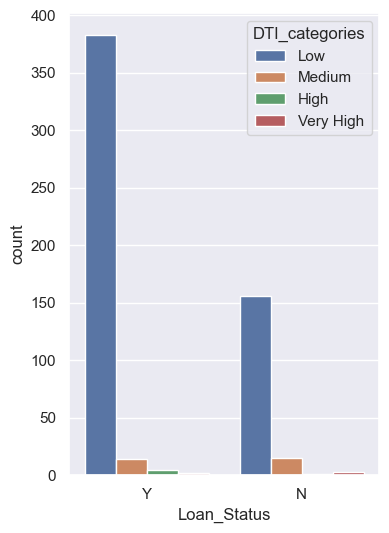

In [720]:
sns.countplot(x='Loan_Status' , hue='DTI_categories' ,data=df)

<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> -Applicants who have very high  debit-to-income ratio   </h1>

In [786]:
df[df['DTI_categories']=='Very High']['Loan_Status'].value_counts()

Loan_Status
N    2
Name: count, dtype: int64

<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> - What correlation between ApplicantIncome and CoapplicantIncome ?   </h1>

In [788]:
df[['CoapplicantIncome','LoanAmount']].corr()
# week correlation

,CoapplicantIncome,LoanAmount
CoapplicantIncome,1.000000,0.287821
LoanAmount,0.287821,1.000000


<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> - Get the Relationship Between Applicant Income and Area? </h1>

In [794]:
df.groupby('Property_Area').max()['ApplicantIncome']

Property_Area
Rural        10000
Semiurban    10139
Urban         9703
Name: ApplicantIncome, dtype: int64

<Axes: xlabel='Property_Area', ylabel='ApplicantIncome'>

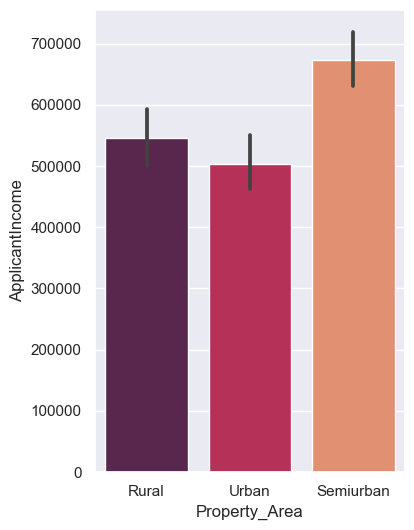

In [790]:
sns.barplot(x="Property_Area", y="ApplicantIncome", data=df,   estimator=np.sum ,palette='rocket')

<h1 style="font-family:Times New Roman; font-size:6m;color:BLUE;"><em> Data Preparation for Machine Learning</em> </h1>

In [364]:
def Create_Target(l):
    if l =='Y' :
        return 1
    else:
        return 0

In [365]:
df["Loan_Status"] = df["Loan_Status"].apply(Create_Target)

In [366]:
df = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area','Loan_Status','DTI']]

## ◾ Decide Scaling Techniques

#### Decide the appropiate Type for Encoding

In [367]:
Cat_feat = df.select_dtypes(include="object_")

In [368]:
for feature in Cat_feat:
    print(f"Feature {feature} has {Cat_feat[feature].nunique()} unique values ")

Feature Gender has 2 unique values 
Feature Married has 2 unique values 
Feature Dependents has 4 unique values 
Feature Education has 2 unique values 
Feature Self_Employed has 2 unique values 
Feature Property_Area has 3 unique values 


### we will do one hot encoding for :
    - Gender 
    - Married 
    - Education 
    - Self_Employed  
    - Property_Area  

In [369]:
Encoder = ColumnTransformer(transformers=[("OHE",OneHotEncoder(sparse=False , drop="first" ),["Gender" , "Married","Education","Self_Employed","Property_Area"])], remainder = "passthrough")

In [370]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'DTI'],
      dtype='object')

In [795]:
df.drop("DTI_categories" , axis = 1 ,inplace=True)

In [373]:
x = df.drop("Loan_Status" , axis = 1 )
y = df["Loan_Status"]

In [374]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from category_encoders import OrdinalEncoder

In [375]:
Encoder = ColumnTransformer(
    transformers=[
        ("OrE", OrdinalEncoder(cols=["Dependents"], mapping=[{'col': 'Dependents', 'mapping': {'0': 1, '1': 2, '2': 3, '3+': 4}}])),
        ("OHE", OneHotEncoder(sparse=False, drop="first"), ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area'])
    ],
    remainder="passthrough"
)

In [376]:
Encoder = ColumnTransformer(
    transformers=[( "OrE",OrdinalEncoder( cols=["Dependents"] , mapping=[{'col' : 'Dependents','mapping': {'0':1,'1':2,'2':3 , '3+':4}}] ) ,['Dependents'])
    ,("OHE",OneHotEncoder(sparse=False , drop="first" ), ['Gender', 'Married', 'Education', 'Self_Employed','Credit_History', 'Property_Area']) ]
    , remainder = "passthrough")
Encoder

ColumnTransformer(remainder='passthrough',
                  transformers=[('OrE',
                                 OrdinalEncoder(cols=['Dependents'],
                                                mapping=[{'col': 'Dependents',
                                                          'data_type': dtype('O'),
                                                          'mapping': 0     1
1     2
2     3
3+    4
dtype: int64}]),
                                 ['Dependents']),
                                ('OHE',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Gender', 'Married', 'Education',
                                  'Self_Employed', 'Credit_History',
                                  'Property_Area'])])

In [377]:
models = list()
models.append(("LR" , LogisticRegression()))
models.append(("KNN" , KNeighborsClassifier()))
models.append(("CART" , DecisionTreeClassifier()))
models.append(("RF" , RandomForestClassifier()))
models.append(("xg" , XGBClassifier()))

In [378]:
for model in models:
    steps = []
    steps.append(("Encoder" , Encoder))
    steps.append(("Scaler" , RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps=steps)
    scores = cross_validate(pipeline ,x ,y , cv = 5 , scoring="accuracy" , return_train_score=True)
    print(model[0])
    print("Train_accuracy" , scores["train_score"].mean() )
    print("-" * 10)
    print("Test_accuracy" , scores["test_score"].mean())
    print("-" * 20)
    print("\n")

LR
Train_accuracy 0.8273399147650645
----------
Test_accuracy 0.8201950659781986
--------------------


KNN
Train_accuracy 0.8093560626494758
----------
Test_accuracy 0.7385829030407344
--------------------


CART
Train_accuracy 1.0
----------
Test_accuracy 0.7433448078026391
--------------------


RF
Train_accuracy 1.0
----------
Test_accuracy 0.8129661503155479
--------------------


xg
Train_accuracy 1.0
----------
Test_accuracy 0.7938037865748709
--------------------




In [379]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'DTI'],
      dtype='object')

In [380]:
from sklearn.preprocessing import OneHotEncoder , RobustScaler ,MinMaxScaler , StandardScaler 
steps = []
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , MinMaxScaler()))
steps.append(("Model" ,LogisticRegression()))
pipeline = Pipeline(steps=steps)

In [381]:
params = {'Model__penalty': ['l1', 'l2','elasticnet'],
          'Model__C': [2,2.1,2.2,2.3],
          'Model__solver': ['liblinear', 'saga',]}


In [382]:
steps = []
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , RobustScaler()))
steps.append(("Model" , LogisticRegression()))
pipeline = Pipeline(steps=steps)

In [383]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=pipeline , param_grid=params , cv = 5 ,scoring = 'accuracy' , return_train_score=True )

grid_search.fit(x,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OrE',
                                                                         OrdinalEncoder(cols=['Dependents'],
                                                                                        mapping=[{'col': 'Dependents',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping': 0     1
1     2
2     3
3+    4
dtype: int64}]),
                                                                         ['Dependents']),
                                                                        ('OHE',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Credit_History',
                                                                          'Property_Area'])])),
                                       ('Scaler', RobustScaler()),
                                       ('Model', LogisticRegression())]),
             param_grid={'Model__C': [2, 2.1, 2.2, 2.3],
                         'Model__penalty': ['l1', 'l2', 'elasticnet'],
                         'Model__solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='accuracy')

In [384]:
grid_search.best_params_

{'Model__C': 2, 'Model__penalty': 'l2', 'Model__solver': 'liblinear'}

In [385]:
print("Mean training accuracy :", grid_search.cv_results_["mean_train_score"].mean())
print("Mean testing accuracy:", grid_search.cv_results_["mean_test_score"].mean())

Mean training accuracy : nan
Mean testing accuracy: nan


In [386]:
print("Mean training accuracy :", grid_search.cv_results_["mean_train_score"].mean())
print("Mean testing accuracy:", grid_search.cv_results_["mean_test_score"].mean())

Mean training accuracy : nan
Mean testing accuracy: nan


#  <font color='#6833FF'>🫗 Save Model</font> 

In [387]:
import joblib

In [388]:
final_model = grid_search.best_estimator_
final_model

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OrE',
                                                  OrdinalEncoder(cols=['Dependents'],
                                                                 mapping=[{'col': 'Dependents',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': 0     1
1     2
2     3
3+    4
dtype: int64}]),
                                                  ['Dependents']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('Scaler', RobustScaler()),
                ('Model', LogisticRegression(C=2, solver='liblinear'))])

In [389]:
joblib.dump(final_model , "Model.pkl")
joblib.dump(x.columns , "Inputs.pkl")

['Inputs.pkl']

In [390]:
Model = joblib.load("Model.pkl")

In [391]:
y.iloc[5]

1

In [392]:
Model.predict(x.iloc[[5]])[0]

1

In [394]:
x.sample()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,DTI
104,Male,Yes,0,Graduate,No,4583,5625.0,255000000.0,30.0,1.0,Semiurban,15455.669503
